## ***Introduction to Business Problem:***  
>To educate people about the impact and risk of bad habit and lack of disciple while driving, a whole analytics section is to be conducted in order to classify new estimated cases of human/environment anomaly that will potentially lead to different classes of injuries and fatalities and Public & personal properties damages.


### ***Data Introduction***
The data provide a history of accident recorded by the government, which rates the accident severity by looking at different factors as:  

#### ***Independent Variables:***

>•	**Counts of Involved:** Persons, Pedestrian, bicycles, vehicles count.  
>•	**Conditions of:** Environment, Road, Junction type, Light .  
>•	**Potential causes flags:** Inattention, drugs or alcohols, speeding, pedestrian right Flags.   
>•	**Injuries:** number of total injuries, serious injuries and fatalities.  
>•	**Timeframe and place:** Date and Place pf the accident.  
>•	**Others:** Collision type, parked car hit.   


#### ***Dependent Variables:***

Based on all factors described above, a raking ( severity code ) is given to the accident.  
>•	***Severity Code and its description.***

[attached](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf) a link of the Metadata that can explain some details about data features 


In [1]:
! pip install missingno

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msn
sns.set()

#### Import data

In [3]:
df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(194673, 38)

### Data Wrangling and  Feature selection

> **Missing Data & Pre Freature exclusion**

>>* **DROP rows having the following rules:** 
>>> 1. EXCEPTRSNDESC WHERE = NEI  
>>> 2. ALL these columns null: UNDERINFL & WEATHER & ROADCOND & LIGHTCOND
>>* **DROP the columns:**
>>>1. COLDETKEY,SDOT_COLCODE,LOCATION,ST_COLCODE,SDOT_COLDESC,INTKEY,OBJECTID,INCKEY,EXCEPTRSNDESC,EXCEPTRSNCODE,SEVERITYDESC,SDOTCOLNUM, SEVERITYCODE.1,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,REPORTNO
>>>2. INCDTTM and INCDATE after extracting the day of week, month of year, hour of day
>>>3. JUNCTIONTYPE as it's almost a duplicate of the the feature ADDRTYPE
>>>4. STATUS as it has one value which is MATCHED
>>* **Replace Na:**
>>>1. **With 0** for the columns INATTENTIONIND, PEDROWNOTGRNT, SPEEDING, X,Y,UNDERINFL
>>>2. **with Unknown** for the columns JUNCTIONTYPE 


> **Data formating**
>>**As text :** "ADDRTYPE","COLLISIONTYPE","WEATHER","ROADCOND","LIGHTCOND" as text  
>>**As Integer :** SEVERITYCODE, COLDETKEY, PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT, INATTENTIONIND, UNDERINFL, PEDROWNOTGRNT, SPEEDING, HITPARKEDCAR, Day Of Week, Month, Hour  
>>**As Float :** X, Y   
> **Feature Manupilation**
>> **Extract day of week, month of year and hour of day from INCDTTM**




In [5]:
df["INCDATE"]=pd.to_datetime(df["INCDATE"])
df["INCDTTM"]=pd.to_datetime(df["INCDTTM"])
df["Day Of Week"]=df["INCDTTM"].dt.weekday
df["Month"]=df["INCDTTM"].dt.month
df["Year"]=df["INCDTTM"].dt.year
df["Hour"]=df["INCDTTM"].dt.hour

In [6]:
df=df[df.EXCEPTRSNDESC.isnull()]
df=df[(df.UNDERINFL.notnull()) & (df.WEATHER.notnull())& (df.ROADCOND.notnull())& (df.LIGHTCOND.notnull())]
df.drop(columns=["COLDETKEY","SDOT_COLCODE","ST_COLCODE","SDOT_COLDESC","REPORTNO","STATUS","JUNCTIONTYPE","LOCATION","INTKEY","OBJECTID","INCKEY","SEVERITYDESC","SEVERITYCODE.1","EXCEPTRSNDESC","EXCEPTRSNCODE","SDOTCOLNUM","ST_COLDESC","SEGLANEKEY","CROSSWALKKEY","INCDTTM","INCDATE"],inplace=True)
df[["INATTENTIONIND", "PEDROWNOTGRNT", "SPEEDING", "X","Y","UNDERINFL"]]=df[["INATTENTIONIND", "PEDROWNOTGRNT", "SPEEDING", "X","Y","UNDERINFL"]].replace(np.nan,0)
df[["INATTENTIONIND","SPEEDING","HITPARKEDCAR","PEDROWNOTGRNT","UNDERINFL"]]=df[["INATTENTIONIND","SPEEDING","HITPARKEDCAR","PEDROWNOTGRNT","UNDERINFL"]].replace(["N","Y"],[0,1])

### Data Formating

In [7]:
df[["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INATTENTIONIND", "UNDERINFL", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR", "Day Of Week", "Month", "Hour"]]=df[["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INATTENTIONIND", "UNDERINFL", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR", "Day Of Week", "Month", "Hour"]].astype(int)
df[["X","Y"]]=df[["X","Y"]].astype(float)
df[["ADDRTYPE","COLLISIONTYPE","WEATHER","ROADCOND","LIGHTCOND"]]=df[["ADDRTYPE","COLLISIONTYPE","WEATHER","ROADCOND","LIGHTCOND"]].astype(str)

<Figure size 720x360 with 0 Axes>

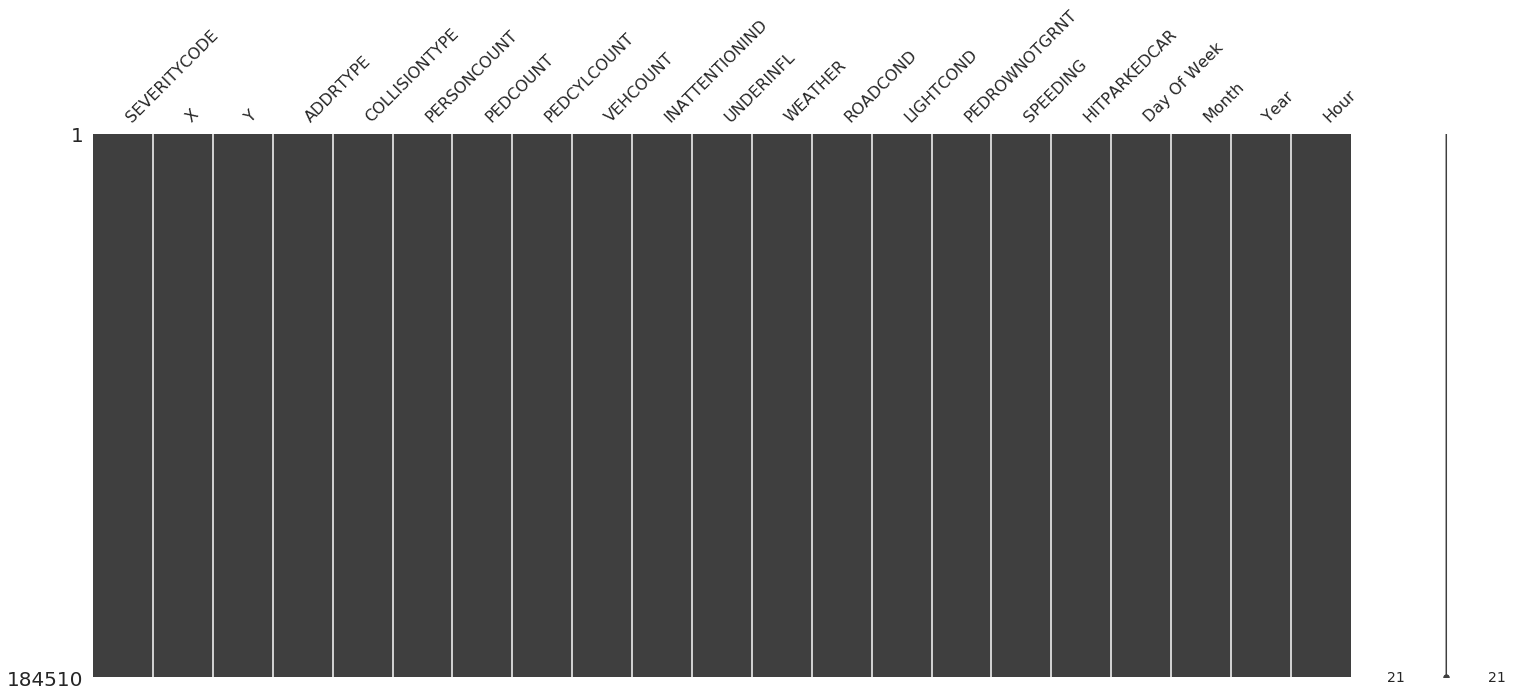

In [8]:
plt.figure(figsize=(10,5))
msn.matrix(df)
plt.show()

# EDA
> **Corelation Matrix**

#### Corelation Matrix

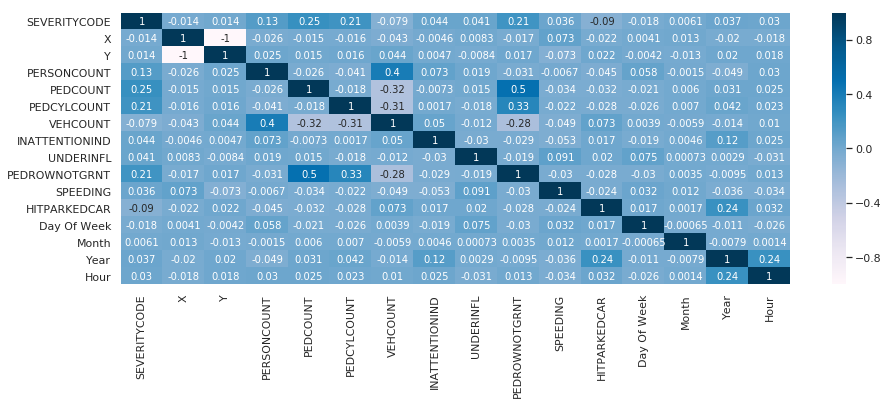

In [9]:
cor=df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(cor,vmin=-1,vmax=1,cbar=True,cmap='PuBu',annot=True)
plt.show()

### Pairplot

plt.figure(figsize=(20,10))
sns.pairplot(df[['SEVERITYCODE', 'X', 'Y', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING',
       'HITPARKEDCAR', 'Day Of Week', 'Month', 'Year', 'Hour']])
plt.plot()

### Data normliaztion

In [10]:
ndf=df.copy()

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
df.SEVERITYCODE.value_counts()

1    127905
2     56605
Name: SEVERITYCODE, dtype: int64

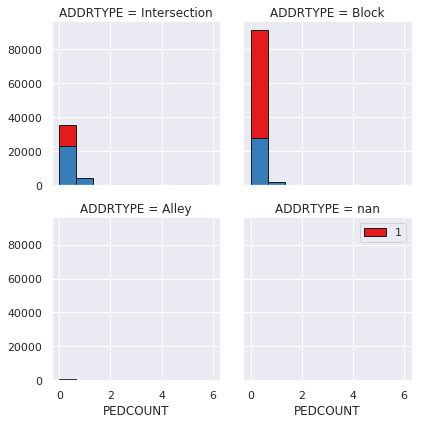

In [13]:
bins = np.linspace(df.PEDCOUNT.min(), df.PEDCOUNT.max(), 10)
g = sns.FacetGrid(df, col="ADDRTYPE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'PEDCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

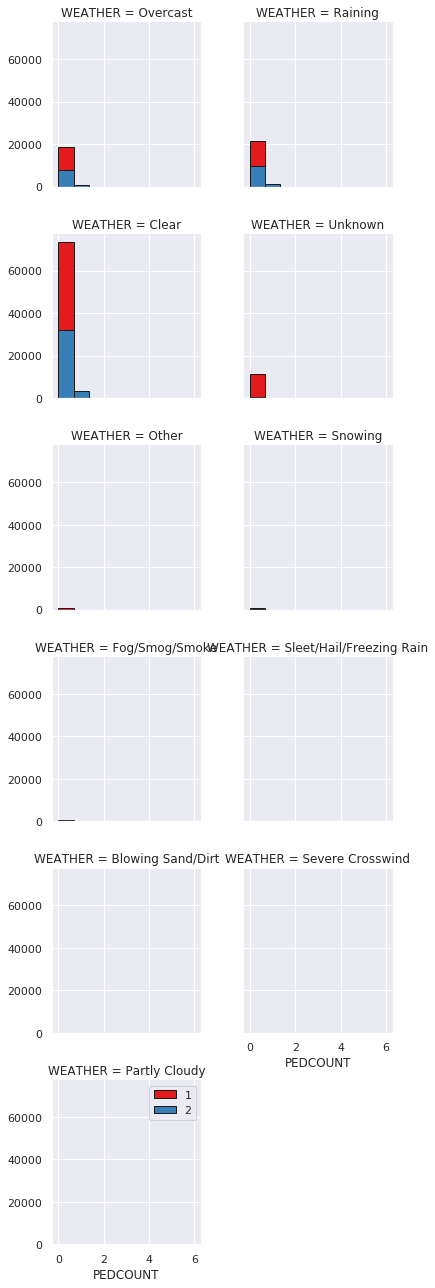

In [14]:
bins = np.linspace(df.PEDCOUNT.min(), df.PEDCOUNT.max(), 10)
g = sns.FacetGrid(df, col="WEATHER", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'PEDCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

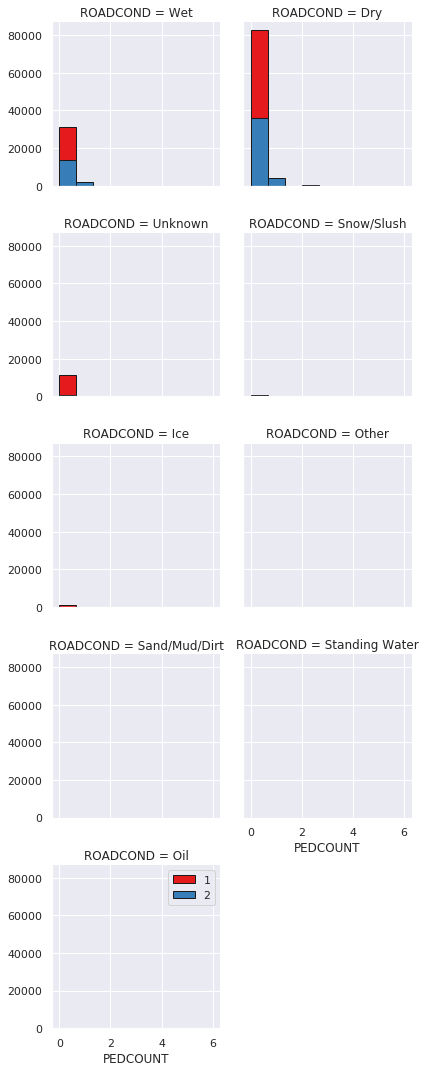

In [15]:
bins = np.linspace(df.PEDCOUNT.min(), df.PEDCOUNT.max(), 10)
g = sns.FacetGrid(df, col="ROADCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'PEDCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

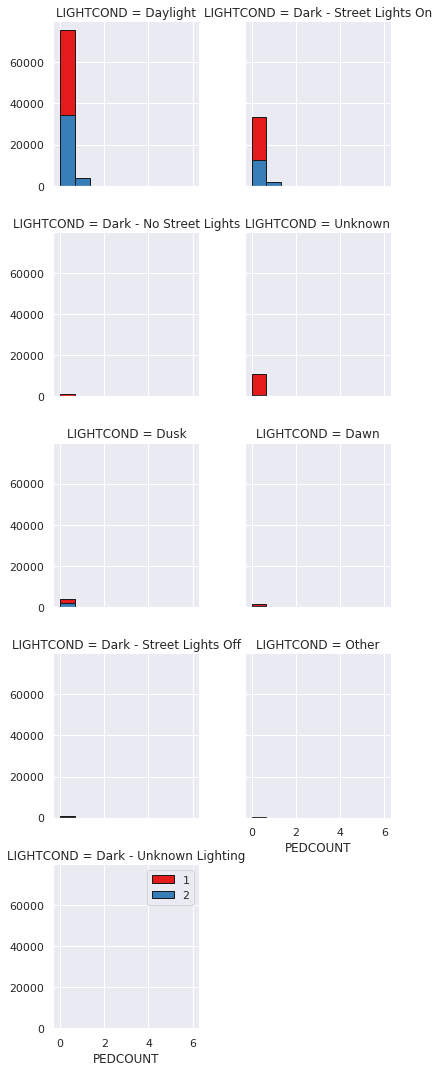

In [16]:
bins = np.linspace(df.PEDCOUNT.min(), df.PEDCOUNT.max(), 10)
g = sns.FacetGrid(df, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'PEDCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### Preparing data for KNN

**1. One hot encoding**

In [17]:
ndf=pd.get_dummies(ndf,columns=['ADDRTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND'])

In [18]:
ndf.columns

Index(['SEVERITYCODE', 'X', 'Y', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING',
       'HITPARKEDCAR', 'Day Of Week', 'Month', 'Year', 'Hour',
       'ADDRTYPE_Alley', 'ADDRTYPE_Block', 'ADDRTYPE_Intersection',
       'ADDRTYPE_nan', 'COLLISIONTYPE_Angles', 'COLLISIONTYPE_Cycles',
       'COLLISIONTYPE_Head On', 'COLLISIONTYPE_Left Turn',
       'COLLISIONTYPE_Other', 'COLLISIONTYPE_Parked Car',
       'COLLISIONTYPE_Pedestrian', 'COLLISIONTYPE_Rear Ended',
       'COLLISIONTYPE_Right Turn', 'COLLISIONTYPE_Sideswipe',
       'COLLISIONTYPE_nan', 'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear',
       'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other', 'WEATHER_Overcast',
       'WEATHER_Partly Cloudy', 'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing',
       'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice', 'ROADCOND_Oil',
       'ROADCOND_Other', 'ROADCOND_Sand/Mud

In [19]:
ndf["SEVERITYCODE"]=ndf["SEVERITYCODE"].astype(str)

In [20]:
x=ndf.drop(columns='SEVERITYCODE')

In [21]:
y=ndf.SEVERITYCODE

**2. Normalization**

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ds=StandardScaler()

In [24]:
X=StandardScaler().fit(x).transform(x)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


**3. Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.05,random_state=4)

In [27]:
k=np.arange(5,15,1)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
acuarcy=[]

knn=KNeighborsClassifier(n_neighbors =15).fit(x_train,y_train)

In [29]:
for i in k:
    print(i)
    knn=KNeighborsClassifier(i).fit(x_train,y_train)
    y_hat=knn.predict(x_test)
    acuarcy.append(f1_score(y_test,y_hat,labels=["1","2"], average='weighted'))

5
6
7
8
9
10
11
12
13
14


In [30]:
f1_score(y_test,y_hat,labels=["1","2"], average='weighted')

0.7038112741453142

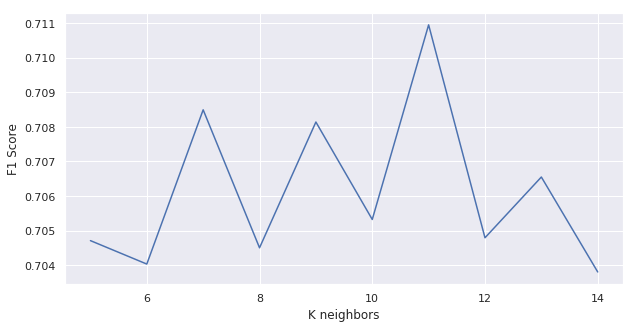

In [34]:
plt.figure(figsize=(10,5))
plt.plot(k,acuarcy)
plt.xlabel('K neighbors')
plt.ylabel('F1 Score')
plt.show()

In [33]:
acuarcy

[0.7047153842845165,
 0.7040386847866859,
 0.7084909268944953,
 0.7045081474579798,
 0.7081384398634154,
 0.7053257735129372,
 0.7109433090852405,
 0.7047975366005095,
 0.7065511455690127,
 0.7038112741453142]

In [31]:
from sklearn.metrics import confusion_matrix, classification_report


In [32]:
cr=classification_report(y_test,y_hat)
print(cr)

              precision    recall  f1-score   support

           1       0.75      0.92      0.82      6300
           2       0.66      0.34      0.44      2926

   micro avg       0.73      0.73      0.73      9226
   macro avg       0.70      0.63      0.63      9226
weighted avg       0.72      0.73      0.70      9226

